In [ ]:
from modelling import fhn_modelling
import matplotlib.pyplot as plt
import numpy as np

dt = 0.1
time = 400
list_B = [2, 1.5, 1.0]
t = np.arange(0, time, dt)


plt.figure(figsize=(6, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle('Different types of dynamics from the FHN model. U vs Time')

for i in range(len(list_B)):
    plt.subplot(3, 1, i+1)
    mat_U1, _ = fhn_modelling(u_init=-0.33, v_init=-0.3, B=list_B[i], dt=0.1, time=time)
    mat_U2, _ = fhn_modelling(u_init=-0.35, v_init=-0.3, B=list_B[i], dt=0.1, time=time)
    plt.plot(t, mat_U1, c="red")
    plt.plot(t, mat_U2, c="blue")
    plt.ylabel(f"b = {list_B[i]} \n\n U")
    plt.ylim([-1.5, 1.5])
    plt.axhline(y = -0.34, color = 'grey', linestyle = 'dashed', label = "treshold")
plt.xlabel('TIME')
plt.show()



In [ ]:
plt.figure(figsize=(6, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.suptitle('Different types of dynamics from the FHN model. U vs V')
for i in range(len(list_B)):
    plt.subplot(3, 1, i+1)
    mat_U1, mat_V1 = fhn_modelling(u_init=-0.33, v_init=-0.3, B=list_B[i], dt=0.1, time=time)
    mat_U2, mat_V2 = fhn_modelling(u_init=-0.35, v_init=-0.3, B=list_B[i], dt=0.1, time=time)
    plt.plot(mat_V1, mat_U1, c="red")
    plt.plot(mat_V2, mat_U2, c="blue")
    plt.ylabel(f"b = {list_B[i]} \n\n U")
    plt.ylim([-1.5, 1.5])
    plt.xlim([-1, 1])
plt.xlabel('V')
plt.show()

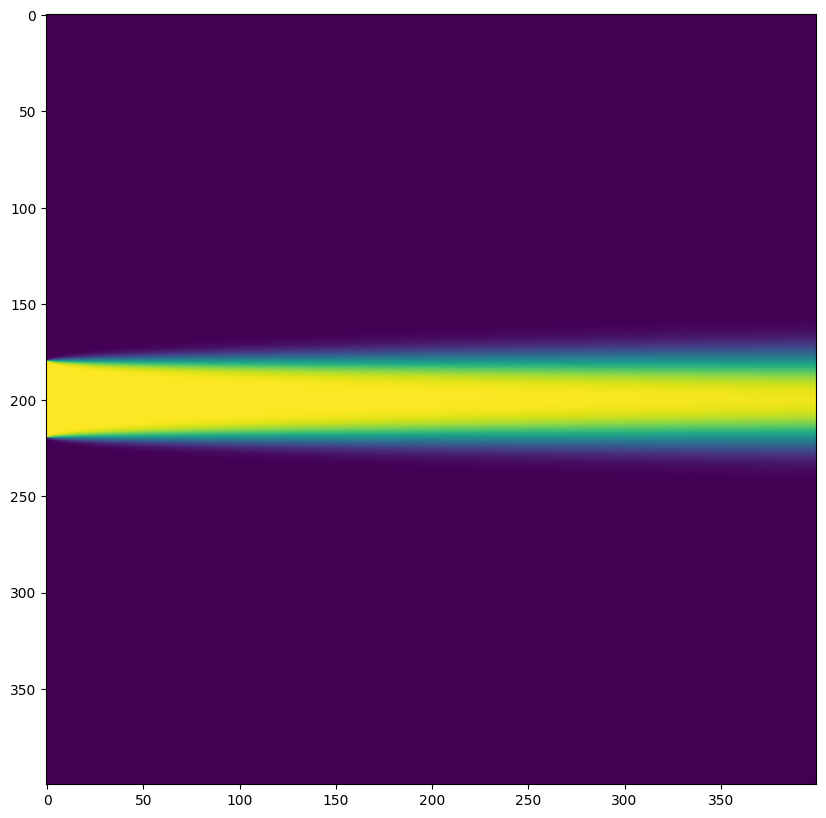

In [2]:
from re import A
import matplotlib.pyplot as plt
import numpy as np

# Parameters
L = 400 # Number of position
T = 400 # Number oft timepoints
A = 0.1
E = 0.01
B = 1

D = 1 # Difusion coefficient
dx = 1 # (space intervals)
dt = 0.1 # (time intervals)

F = D*dt/dx**2
# Initialization
mat_U, mat_V = np.full((L, T), -0.6), np.full((L, T), -0.3)
mat_U[180:220, 0] = 1

# Algorithm
for j in range(0, T-1):
    #print(mat_U[1, j])
    for i in range(1, L-1):
        #print('avant : ', mat_U[i, j])
        # Pour les valeurs aux bords (mat_c[L] par exemple) on peut fixer les valeurs à 0
        mat_U[i, j + 1] = mat_U[i, j] + F * (mat_U[i+1, j] - 2*mat_U[i, j] + mat_U[i-1, j])
        mat_V[i, j + 1] = mat_V[i, j] + F * (mat_V[i+1, j] - 2*mat_V[i, j] + mat_V[i-1, j])
        #mat_U[i, j + 1] = mat_U[i, j]
        #mat_V[i, j + 1] = mat_V[i, j]
        #print('après : ', mat_U[i, j + 1])
# Visualization
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(mat_U)
plt.show()
